## Notebook to graph sp_sysmon output

This notebook will do a plot of the sp_sysmon metrics

input file is a .csv file generated with **sst_sp_sysmon_parser.sh**

sst_sp_sysmon_parser.sh is calling a *awk* file to parse every sp_sysmon output.

The generated file is called *sp_sysmon_<timestamp>_results.csv* and has the following output
  
  
<font color='blue'>date;time;dataserver;version;user_percent;system_percent;io_percent;idle_percent;context switch cache search miss;context switch exceedint IO;context switch system disk;context switch Last log page write;context switch IO device contention;context switch network packet received;context switch network packet sent;housekeeper wash dirty;ulc flush by full ulc; minimally logged ulc flush byfull ulc; ulc log semaphore wait; ulc semaphore wait;all caches hit; all caches miss; all caches buffer grabbed dirty; all cacheslarge io denied pool too small;all caches large io effectiveness;def data cache hit;def data cache hit in wash;def data cache miss;def data cache large io denied pool too small;def data cache large io used;stmt cached;stmt found; stmt not found;stmt dropped;max outstanding io;io delay structure io;io delay server config; io delay engine config; io delay os config;network IO delayed;Avg bytes input per packet;Avg bytes output per packet
2016/6/22;17:46:31;MX613ZN;15.7.0;1.4;0.0;41.9;56.6;58.3;0.1;2.5;0.6;0.0;2.2;0.0;5.5;37.7;0.0;0.0;0.0;98.6;1.4;0.0;2.7;79.7;98.6;0.8;1.4;2.7;79.7;n/a;n/a;n/a;n/a;212;n/a;n/a;n/a;n/a;0.0;92;304
2016/6/22;18:16:37;MX613ZN;15.7.0;6.1;0.1;40.0;53.8;56.9;0.0;6.0;0.1;0.0;0.2;0.0;5.5;87.4;0.0;0.0;0.0;99.4;0.6;0.0;0.5;97.6;99.4;0.0;0.6;0.5;97.6;n/a;n/a;n/a;n/a;212;n/a;n/a;n/a;n/a;0.0;117;515</font>

The file is read in a pandas object then graph with matplotlib

All you have to do is change the code below to point to your output file

    filename = '/Tmp/MEDIOBANCA/PAC_migration_stream/PAC_improvement/ULC_32k_diskIO_5500/sp_sysmon_20160624_1425_results.csv'

### <font color='blue'> Beginning of the program </font>

In [1]:
import IPython
import numpy as np
import datetime as dt
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.dates as mdates
from matplotlib.ticker import MultipleLocator, AutoMinorLocator

#set options for pandas
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 50)

#set options for matplotlib
%matplotlib inline

In [2]:
IPython.__version__,pd.__version__, matplotlib.__version__


('4.0.3', u'0.17.1', '1.5.1')

In [3]:
def my_fig_size():
    plt.style.use('fivethirtyeight') # define the graph predefined style
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 40
    fig_size[1] = 15
    plt.rcParams["figure.figsize"] = fig_size
    plt.rcParams['lines.linewidth']=3

In [4]:
def my_x_axis(minLocator):
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%y/%m/%d %H:%M:%S'))  # define the format of the major tick
    plt.gca().xaxis.set_minor_locator(minLocator)  # define the position of the minor ticks
    plt.gcf().autofmt_xdate()  # format the x-axis label in diagonale so it's readable and the labels don't overlap
    plt.xticks(size=20) #define the size for the x label
    plt.yticks(size=20) #define the size for the y label

# Main program
the program will graph side-by-side two output from sp_sysmon_parser. This will allow to do some comparison

In [5]:
minorLocator = AutoMinorLocator()
#filename_1 = 'D:/Tmp/MEDIOBANCA/PAC_migration_stream/PAC_improvement/ULC_32k_diskIO_5500/sp_sysmon_20160627_1050_results.csv'
filename_1 = 'D:/Tmp/MEDIOBANCA/PAC_migration_stream/PAC_improvement/04.folder03_plus_ULC_128K_batchIOSize_200/sp_sysmon_20160630_1733_results.csv'
filename_2 = 'D:/Tmp/MEDIOBANCA/PAC_migration_stream/PAC_improvement/04.folder03_plus_ULC_128K_batchIOSize_200/sysmon_round2/sp_sysmon_20160701_1054_results.csv'
# load the .csv file in a dataFrame object (pandas)
data_1 = pd.read_csv(filename_1,sep=';',na_values='n/a')
data_2 = pd.read_csv(filename_2,sep=';',na_values='n/a')
data_1['timestamp'] = data_1.date.astype(str).str.cat(data_1.time.astype(str),sep=' ') #define a new column that is a merge od date and time
data_2['timestamp'] = data_2.date.astype(str).str.cat(data_2.time.astype(str),sep=' ') #define a new column that is a merge od date and time
data_1.set_index('timestamp',inplace=True)
data_2.set_index('timestamp',inplace=True)
del data_1['date'],data_1['time'],data_2['date'],data_2['time'] 
#data.fillna(0,inplace=True)
#data_2.columns
#data, data.shape, data.keys(),data.index, data.columns  # display the number of rows in the dataFrance and the column names

In [20]:
data_2.index

Index([u'2016/6/30 17:41:50', u'2016/6/30 17:51:52', u'2016/6/30 18:01:54',
       u'2016/6/30 18:11:59', u'2016/6/30 18:22:00', u'2016/6/30 18:32:02',
       u'2016/6/30 18:42:03', u'2016/6/30 18:52:05', u'2016/6/30 19:02:06',
       u'2016/6/30 19:12:08',
       ...
       u'2016/7/01 09:15:19', u'2016/7/01 09:25:20', u'2016/7/01 09:35:26',
       u'2016/7/01 09:45:28', u'2016/7/01 09:55:30', u'2016/7/01 10:05:32',
       u'2016/7/01 10:15:35', u'2016/7/01 10:25:37', u'2016/7/01 10:35:40',
       u'2016/7/01 10:45:41'],
      dtype='object', name=u'timestamp', length=103)

In [6]:
# define the x axis for all future figures 
x_1 = [dt.datetime.strptime(d,"%Y/%m/%d %H:%M:%S") for d in data_1.index ]
x_2 = [dt.datetime.strptime(d,"%Y/%m/%d %H:%M:%S") for d in data_2.index ]
#x_2

In [7]:
#list all possible style for figures
print(plt.style.available)

[u'seaborn-darkgrid', u'seaborn-notebook', u'classic', u'seaborn-ticks', u'grayscale', u'bmh', u'seaborn-talk', u'dark_background', u'ggplot', u'fivethirtyeight', u'seaborn-colorblind', u'seaborn-deep', u'seaborn-whitegrid', u'seaborn-bright', u'seaborn-poster', u'seaborn-muted', u'seaborn-paper', u'seaborn-white', u'seaborn-pastel', u'seaborn-dark', u'seaborn-dark-palette']


#### <font color='blue'> let's plot kernel utilization metrics </font>

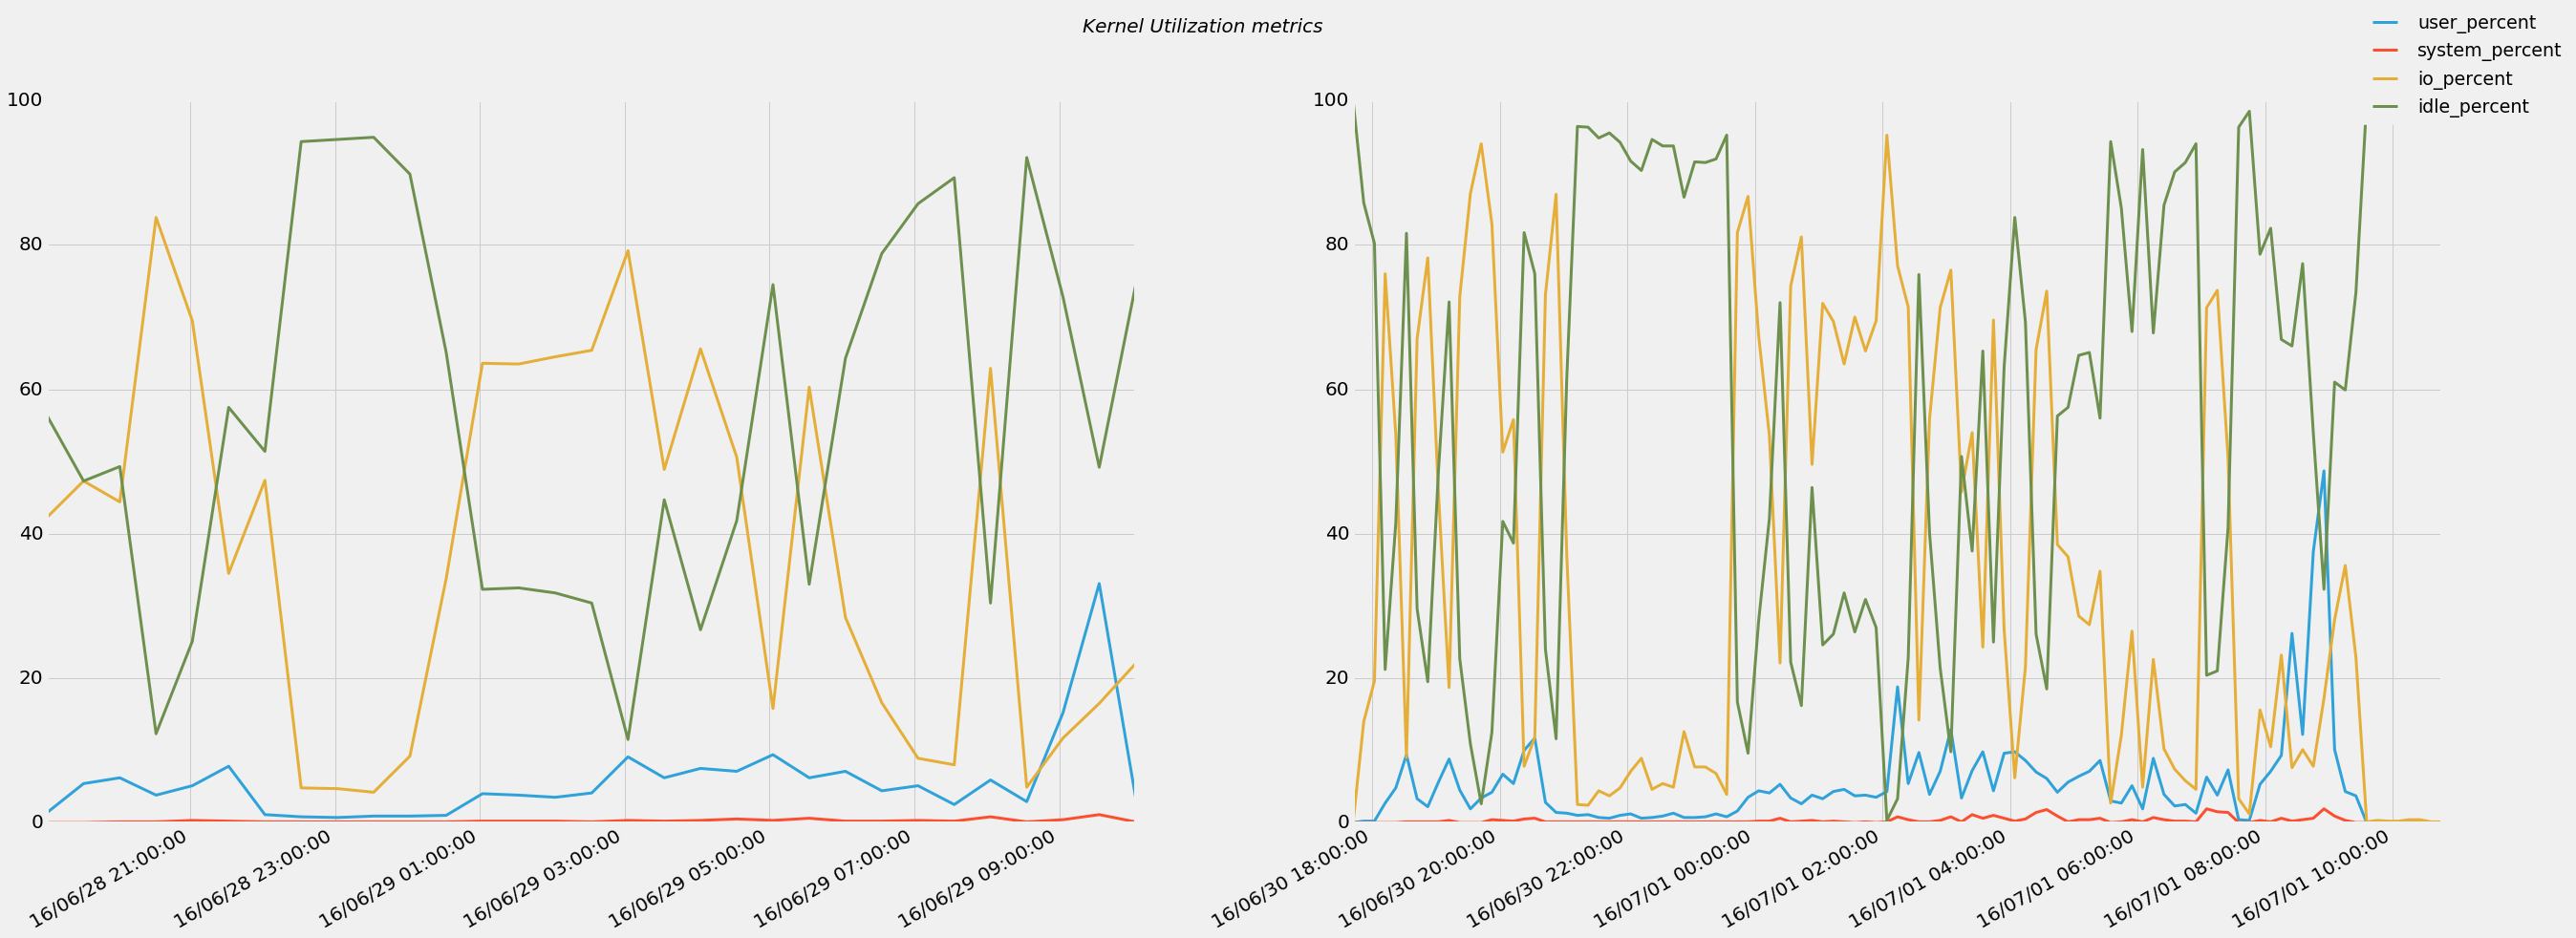

In [17]:
my_fig_size()
plt.figure()

plt.subplot(121)
plt.suptitle('Kernel Utilization metrics', fontsize=20,style='oblique', color='black') #define a title for the graph
my_x_axis(minorLocator)
plt.plot(x_1,data_1[["user_percent","system_percent","io_percent","idle_percent"]])
#plt.plot(x_1,data_1.ix[:,3:4], label=)
#plt.plot(x_1,data_1.ix[:,4:5], label=)
#plt.plot(x_1,data_1.ix[:,5:6], label=)
plt.legend(data_1[["user_percent","system_percent","io_percent","idle_percent"]],bbox_to_anchor=(1, 1),loc=1,bbox_transform=plt.gcf().transFigure,fontsize=19)

plt.subplot(122)
my_x_axis(minorLocator)
plt.plot(x_2,data_2[["user_percent","system_percent","io_percent","idle_percent"]])
plt.legend(data_2[["user_percent","system_percent","io_percent","idle_percent"]],bbox_to_anchor=(1, 1),loc=1,bbox_transform=plt.gcf().transFigure,fontsize=19)

#### <font color='blue'> let's plot context switch metrics </font>

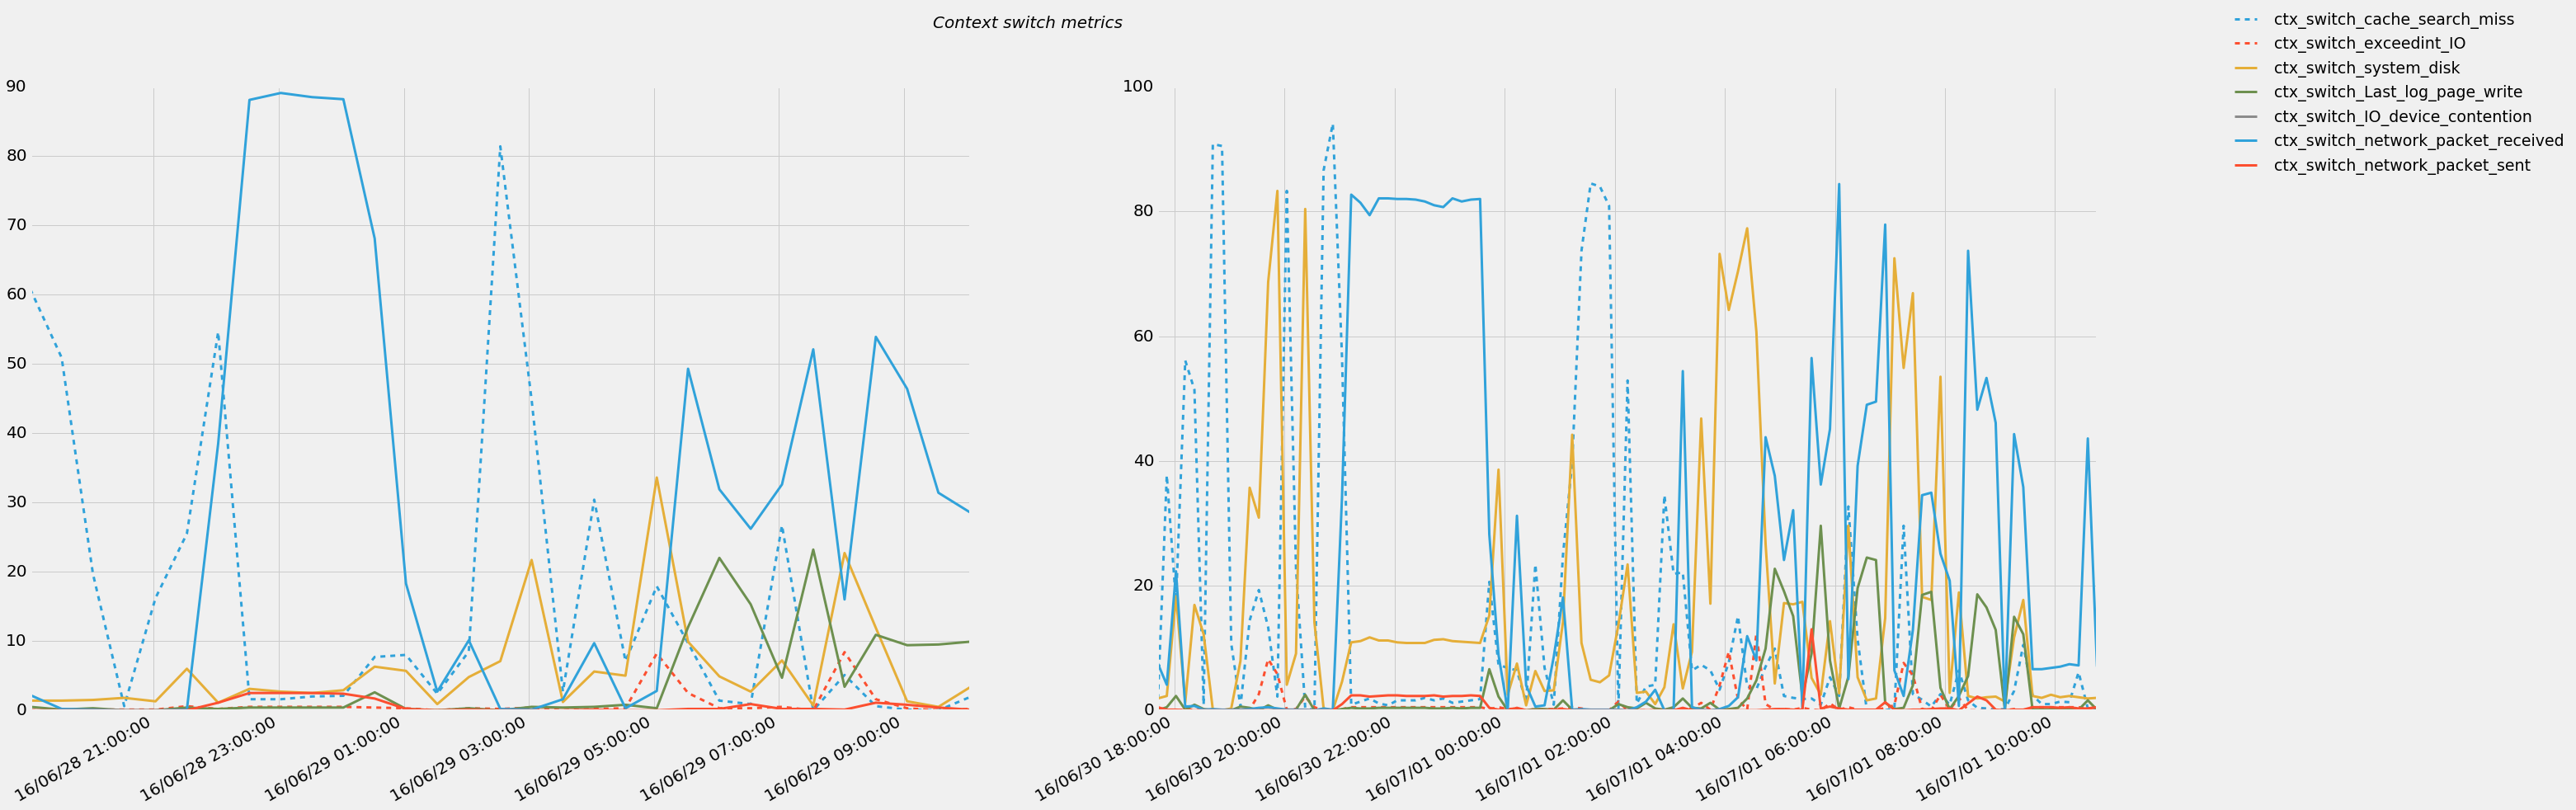

In [19]:
my_fig_size()
plt.figure()

plt.subplot(121)
plt.suptitle('Context switch metrics', fontsize=20,style='oblique', color='black') #define a title for the graph
my_x_axis(minorLocator)
plt.plot(x_1,data_1[["ctx_switch_cache_search_miss"]], "--")
plt.plot(x_1,data_1[["ctx_switch_exceedint_IO"]],"--")
plt.plot(x_1,data_1[["ctx_switch_system_disk","ctx_switch_Last_log_page_write","ctx_switch_IO_device_contention","ctx_switch_network_packet_received","ctx_switch_network_packet_sent"]])
plt.legend(data_1[["ctx_switch_cache_search_miss","ctx_switch_exceedint_IO","ctx_switch_system_disk","ctx_switch_Last_log_page_write","ctx_switch_IO_device_contention","ctx_switch_network_packet_received","ctx_switch_network_packet_sent"]],bbox_to_anchor=(1, 1),loc=2,bbox_transform=plt.gcf().transFigure,fontsize=19)

plt.subplot(122)
my_x_axis(minorLocator)
plt.plot(x_2,data_2[["ctx_switch_cache_search_miss"]], "--")
plt.plot(x_2,data_2[["ctx_switch_exceedint_IO"]],"--")
plt.plot(x_2,data_2[["ctx_switch_system_disk","ctx_switch_Last_log_page_write","ctx_switch_IO_device_contention","ctx_switch_network_packet_received","ctx_switch_network_packet_sent"]])
plt.legend(data_2[["ctx_switch_cache_search_miss","ctx_switch_exceedint_IO","ctx_switch_system_disk","ctx_switch_Last_log_page_write","ctx_switch_IO_device_contention","ctx_switch_network_packet_received","ctx_switch_network_packet_sent"]],bbox_to_anchor=(1, 1),loc=2,bbox_transform=plt.gcf().transFigure,fontsize=19)


#### <font color='blue'> let's plot ULC metrics </font>

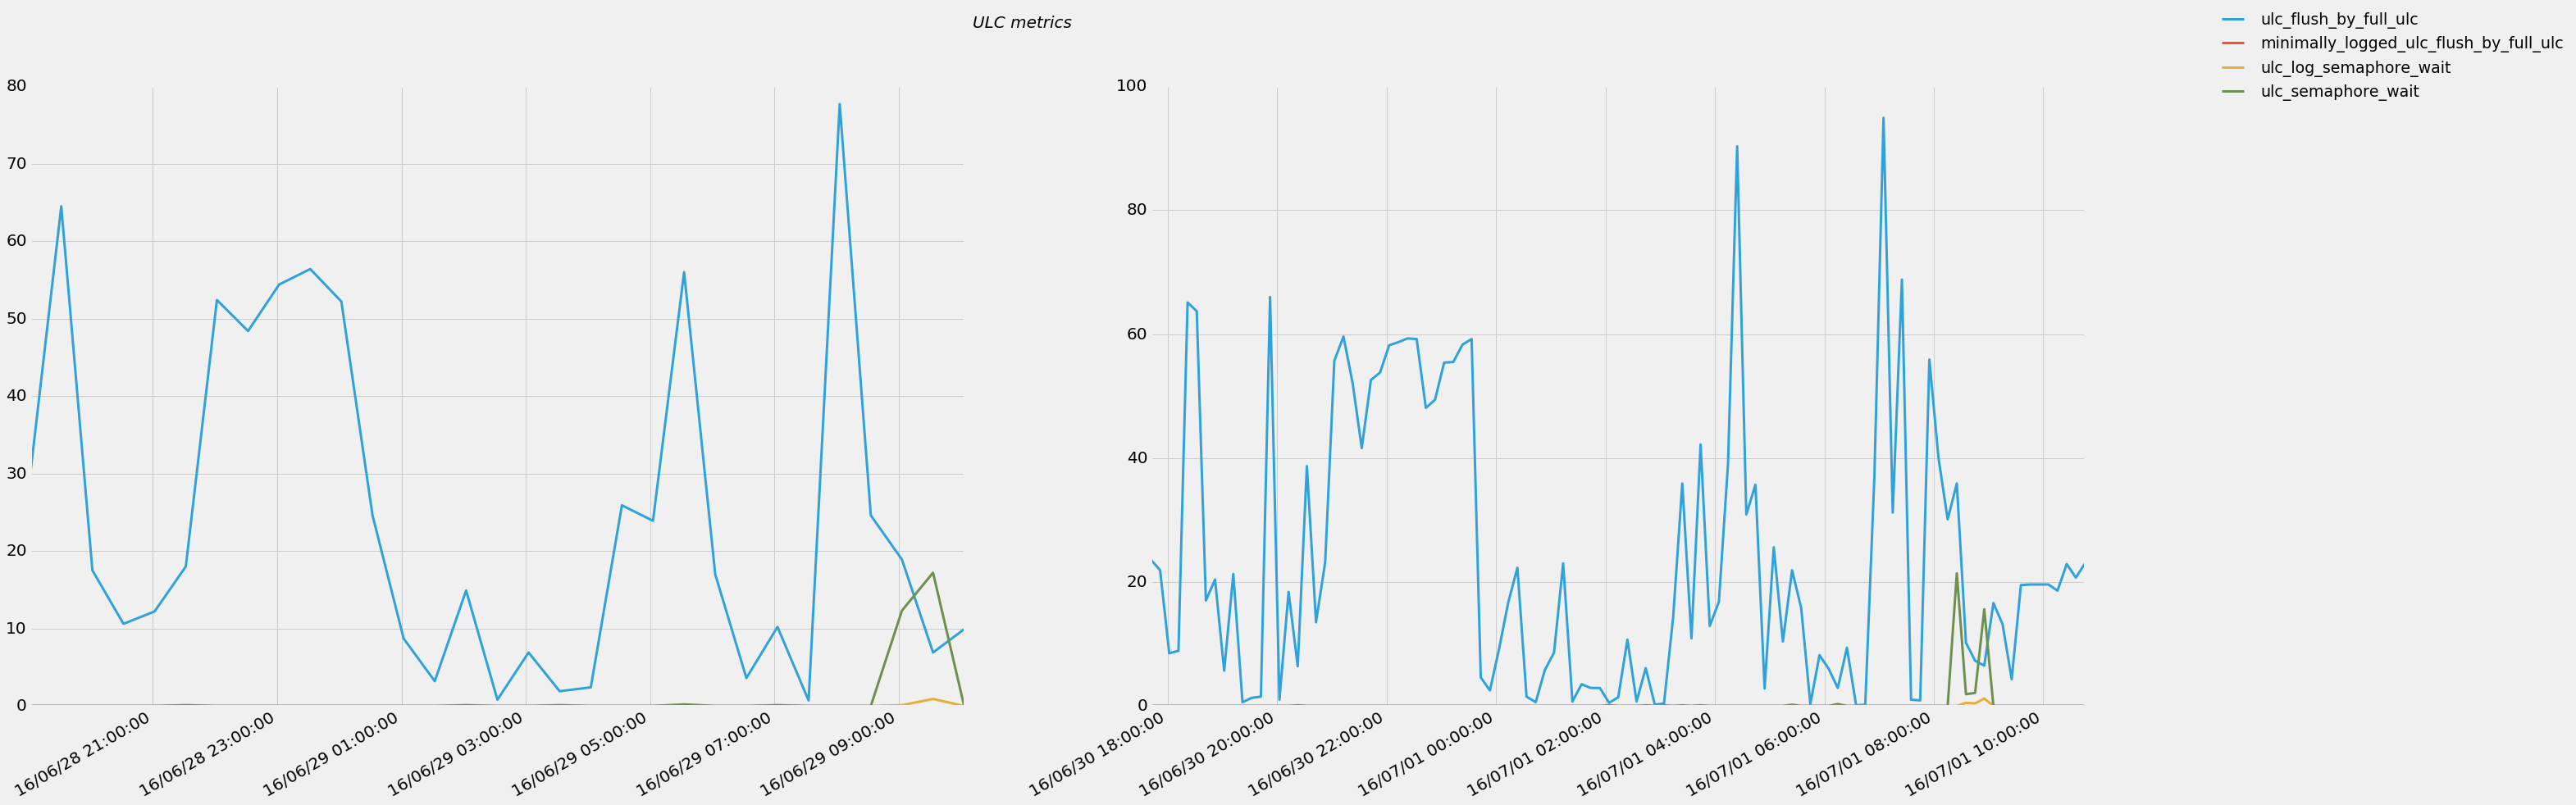

In [10]:
my_fig_size()
plt.figure()

plt.subplot(121)
plt.suptitle('ULC metrics', fontsize=20,style='oblique', color='black') #define a title for the graph
my_x_axis(minorLocator)
plt.plot(x_1,data_1[["ulc_flush_by_full_ulc","minimally_logged_ulc_flush_by_full_ulc","ulc_log_semaphore_wait","ulc_semaphore_wait"]])
plt.legend(data_1[["ulc_flush_by_full_ulc","minimally_logged_ulc_flush_by_full_ulc","ulc_log_semaphore_wait","ulc_semaphore_wait"]],bbox_to_anchor=(1, 1),loc=2,bbox_transform=plt.gcf().transFigure,fontsize=19)

plt.subplot(122)
my_x_axis(minorLocator)
plt.plot(x_2,data_2[["ulc_flush_by_full_ulc","minimally_logged_ulc_flush_by_full_ulc","ulc_log_semaphore_wait","ulc_semaphore_wait"]])
plt.legend(data_2[["ulc_flush_by_full_ulc","minimally_logged_ulc_flush_by_full_ulc","ulc_log_semaphore_wait","ulc_semaphore_wait"]],bbox_to_anchor=(1, 1),loc=2,bbox_transform=plt.gcf().transFigure,fontsize=19)

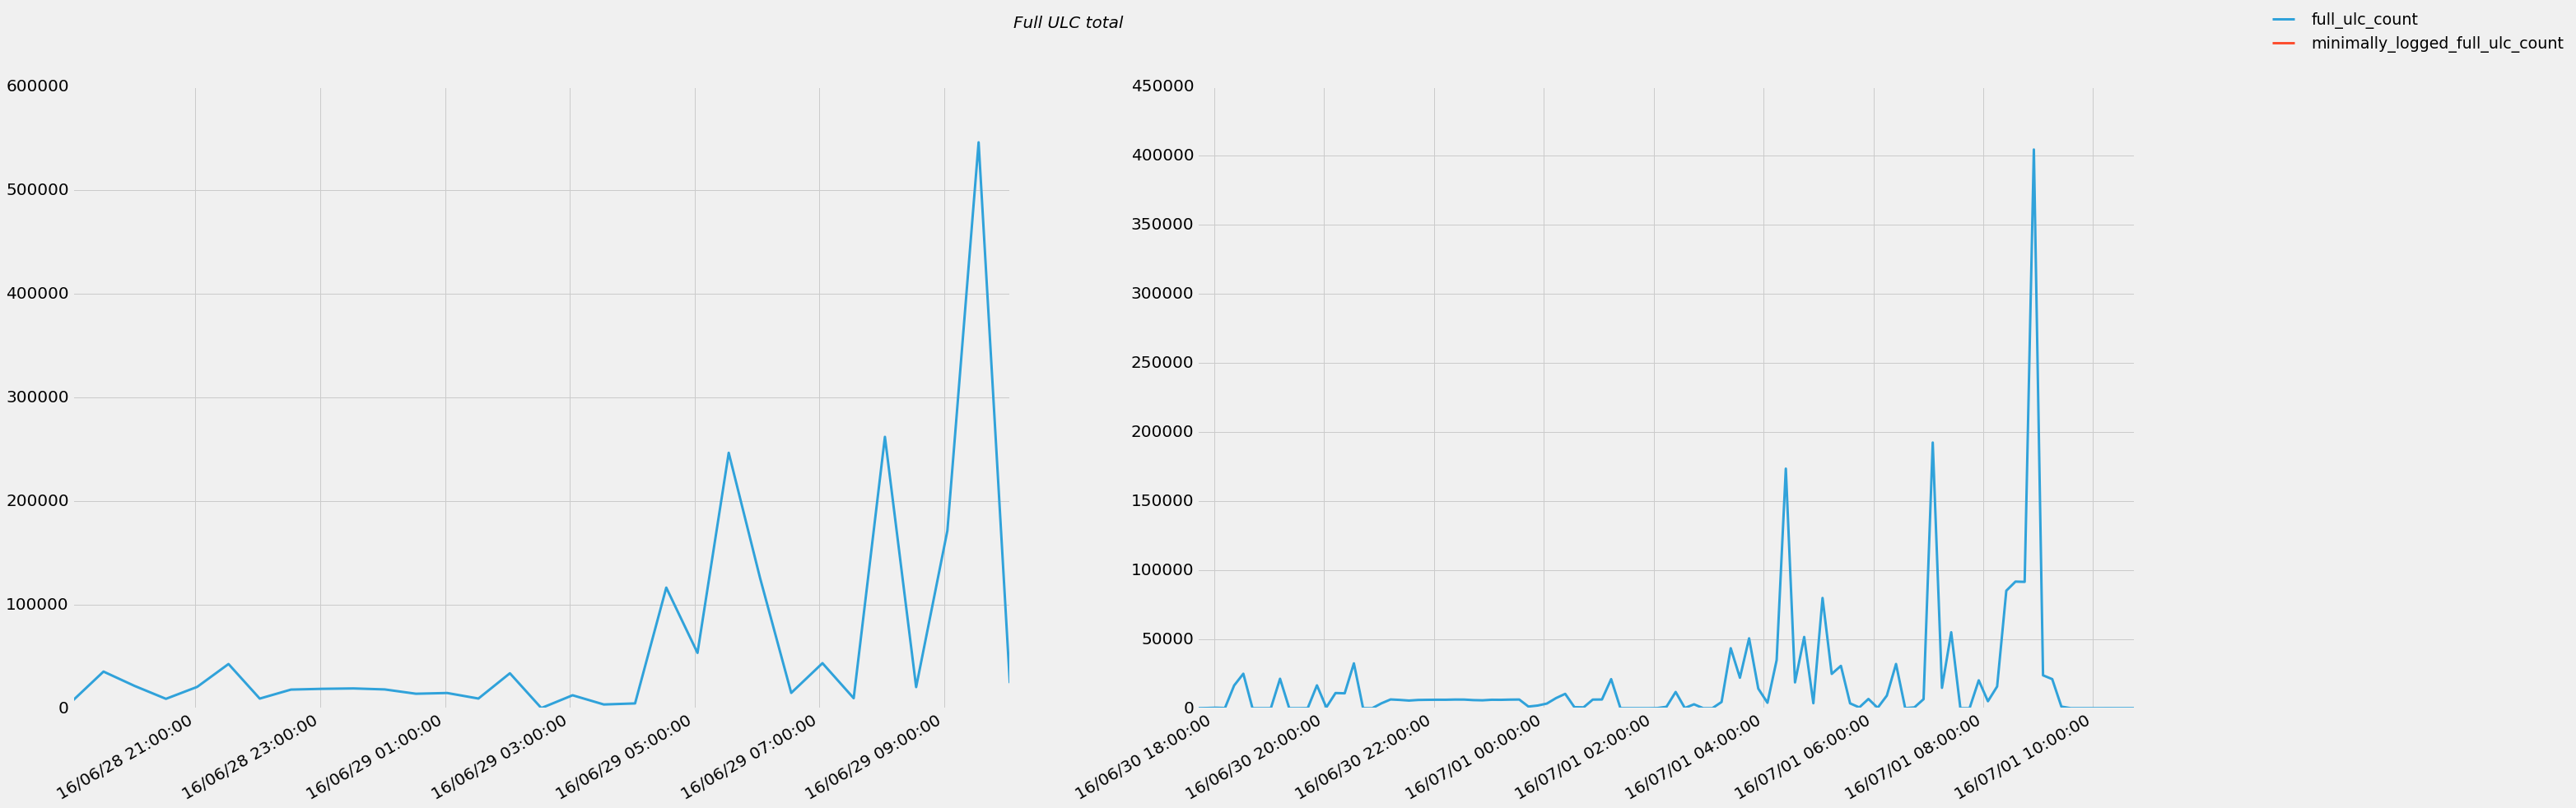

In [11]:
my_fig_size()
plt.figure()

plt.subplot(121)
plt.suptitle('Full ULC total', fontsize=20,style='oblique', color='black') #define a title for the graph
my_x_axis(minorLocator)
plt.plot(x_1,data_1[["full_ulc_count","minimally_logged_full_ulc_count"]])
plt.legend(data_1[["full_ulc_count","minimally_logged_full_ulc_count"]],bbox_to_anchor=(1, 1),loc=2,bbox_transform=plt.gcf().transFigure,fontsize=19)

plt.subplot(122)
my_x_axis(minorLocator)
plt.plot(x_2,data_2[["full_ulc_count","minimally_logged_full_ulc_count"]])
plt.legend(data_2[["full_ulc_count","minimally_logged_full_ulc_count"]],bbox_to_anchor=(1, 1),loc=2,bbox_transform=plt.gcf().transFigure,fontsize=19)


#### <font color='blue'> let's plot Data cache metrics </font>

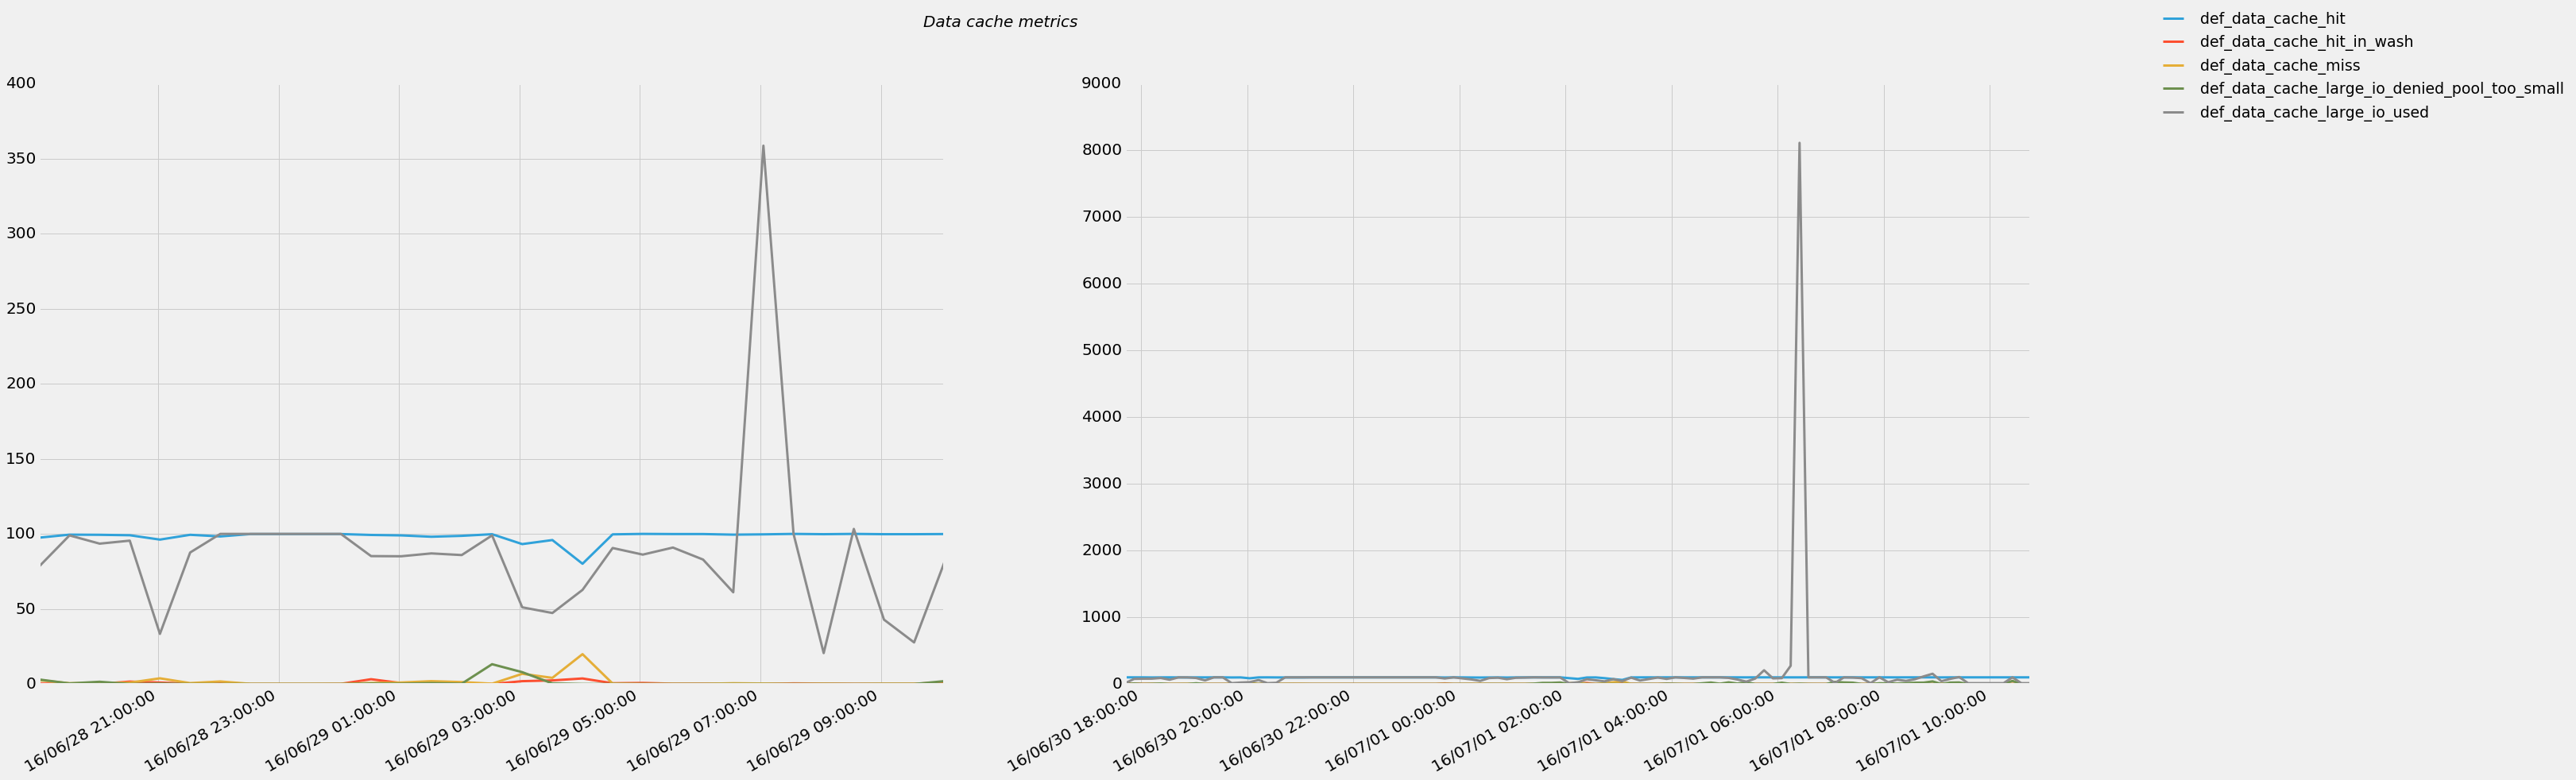

In [12]:
my_fig_size()
plt.figure()

plt.subplot(121)
plt.suptitle('Data cache metrics', fontsize=20,style='oblique', color='black') #define a title for the graph
my_x_axis(minorLocator)
plt.plot(x_1,data_1[["def_data_cache_hit","def_data_cache_hit_in_wash","def_data_cache_miss","def_data_cache_large_io_denied_pool_too_small","def_data_cache_large_io_used"]])
plt.legend(data_1[["def_data_cache_hit","def_data_cache_hit_in_wash","def_data_cache_miss","def_data_cache_large_io_denied_pool_too_small","def_data_cache_large_io_used"]],bbox_to_anchor=(1, 1),loc=2,bbox_transform=plt.gcf().transFigure,fontsize=19)

plt.subplot(122)
my_x_axis(minorLocator)
plt.plot(x_2,data_2[["def_data_cache_hit","def_data_cache_hit_in_wash","def_data_cache_miss","def_data_cache_large_io_denied_pool_too_small","def_data_cache_large_io_used"]])
plt.legend(data_2[["def_data_cache_hit","def_data_cache_hit_in_wash","def_data_cache_miss","def_data_cache_large_io_denied_pool_too_small","def_data_cache_large_io_used"]],bbox_to_anchor=(1, 1),loc=2,bbox_transform=plt.gcf().transFigure,fontsize=19)


#### <font color='blue'> let's plot outstanding IO metrics </font>

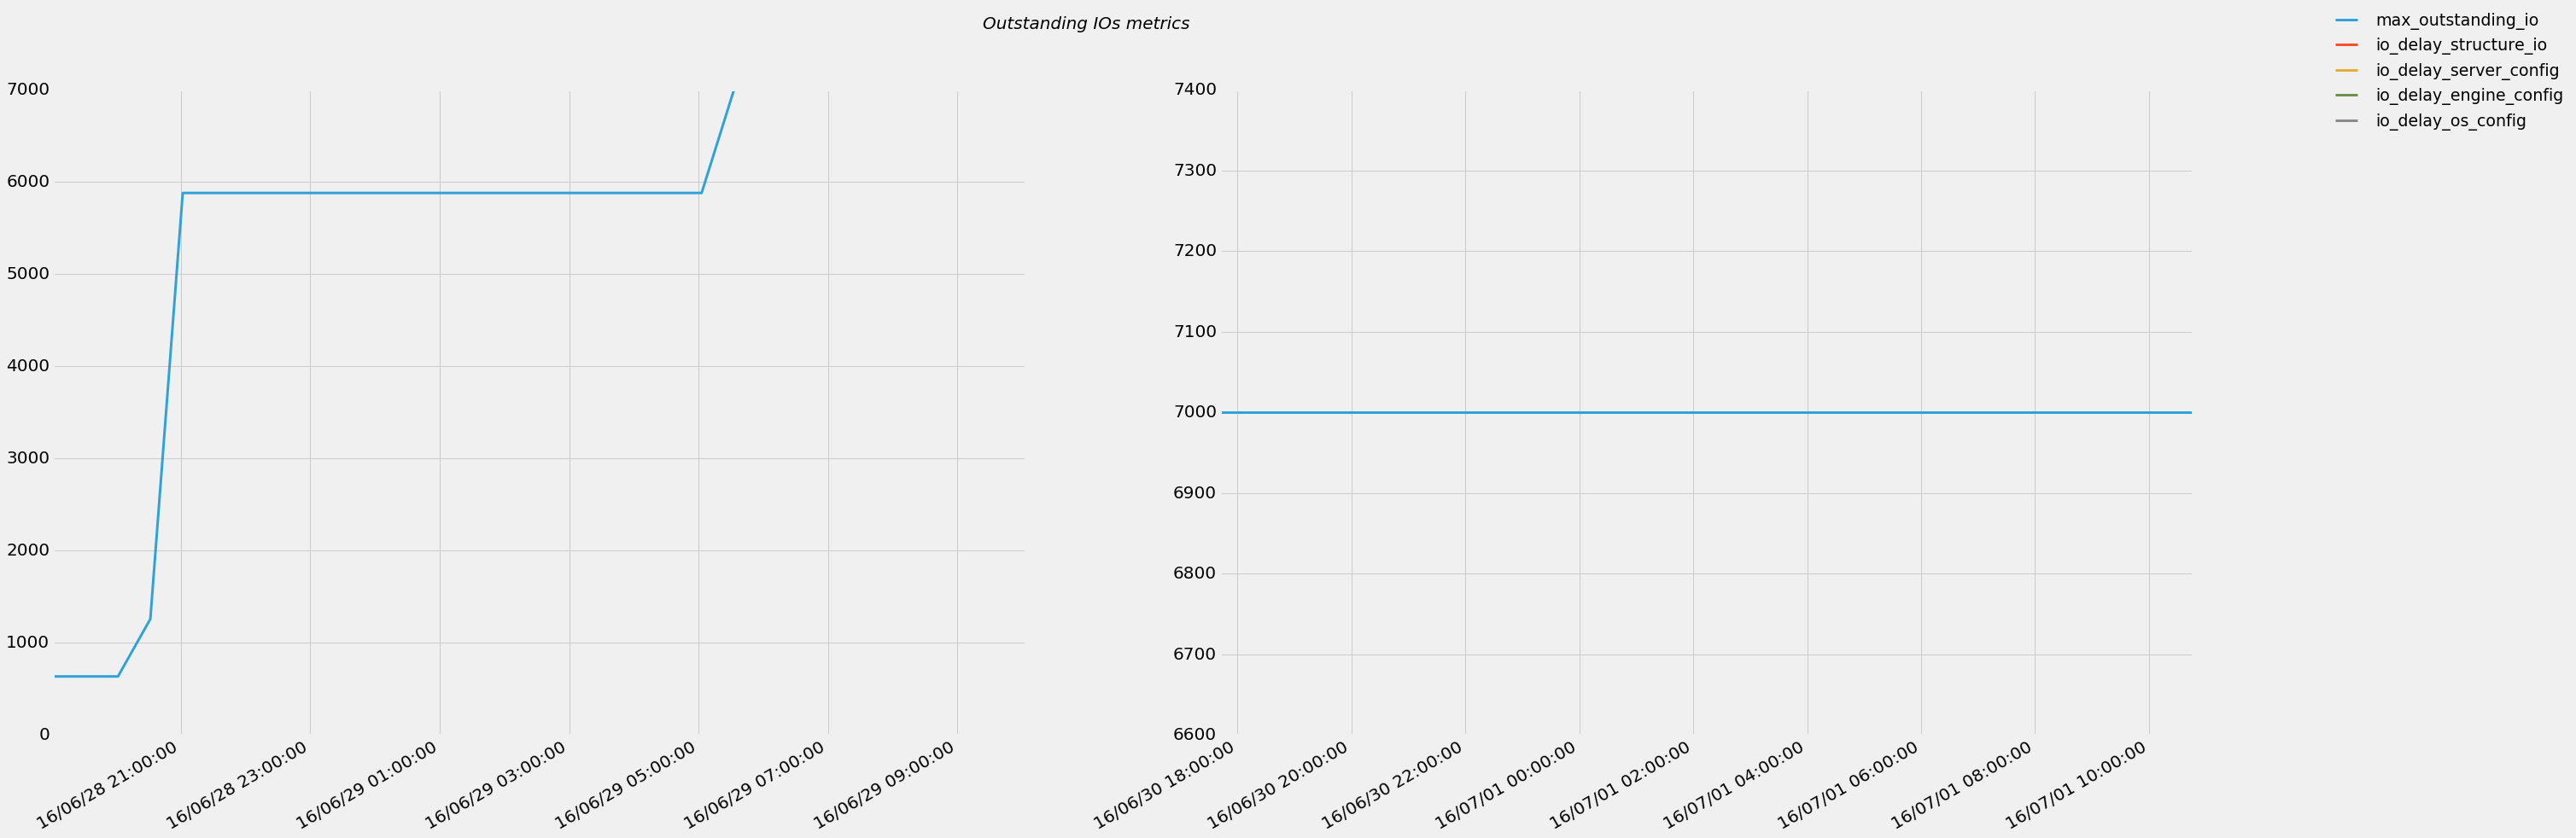

In [13]:
my_fig_size()
plt.figure()
plt.subplot(121)
plt.suptitle('Outstanding IOs metrics', fontsize=20,style='oblique', color='black') #define a title for the graph
my_x_axis(minorLocator)
plt.plot(x_1,data_1[['max_outstanding_io','io_delay_structure_io', u'io_delay_server_config','io_delay_engine_config','io_delay_os_config']])
plt.legend(data_1[['max_outstanding_io','io_delay_structure_io', u'io_delay_server_config','io_delay_engine_config','io_delay_os_config']],bbox_to_anchor=(1, 1),loc=2,bbox_transform=plt.gcf().transFigure,fontsize=19)

plt.subplot(122)
my_x_axis(minorLocator)
plt.plot(x_2,data_2[['max_outstanding_io','io_delay_structure_io', u'io_delay_server_config','io_delay_engine_config','io_delay_os_config']])
plt.legend(data_2[['max_outstanding_io','io_delay_structure_io', u'io_delay_server_config','io_delay_engine_config','io_delay_os_config']],bbox_to_anchor=(1, 1),loc=2,bbox_transform=plt.gcf().transFigure,fontsize=19)


#### <font color='blue'> let's plot network metrics </font>

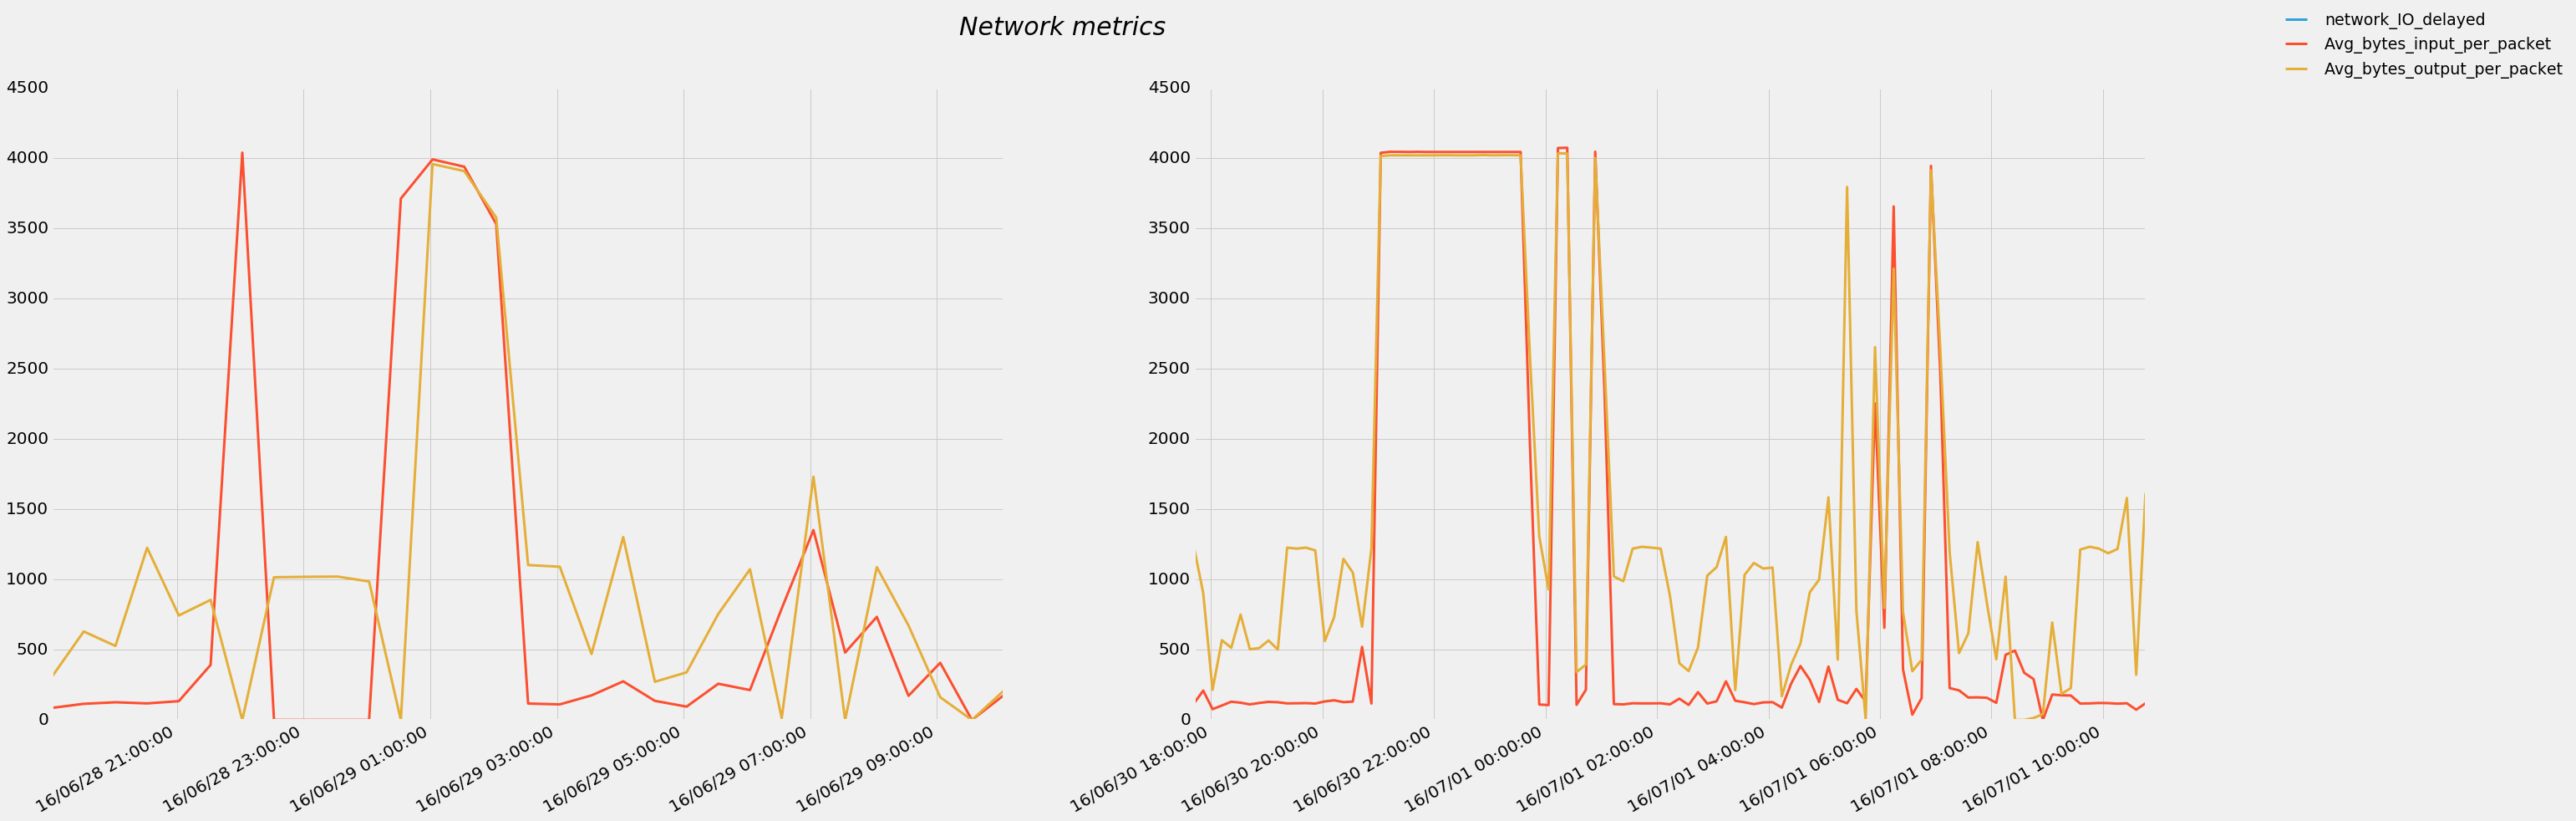

In [14]:
my_fig_size()
plt.figure()

plt.subplot(121)
plt.suptitle('Network metrics', fontsize=30,style='oblique', color='black') #define a title for the graph
my_x_axis(minorLocator)
plt.plot(x_1,data_1[['network_IO_delayed','Avg_bytes_input_per_packet','Avg_bytes_output_per_packet']])
plt.legend(data_1[['network_IO_delayed','Avg_bytes_input_per_packet','Avg_bytes_output_per_packet']],bbox_to_anchor=(1, 1),loc=2,bbox_transform=plt.gcf().transFigure,fontsize=19)

plt.subplot(122)
my_x_axis(minorLocator)
plt.plot(x_2,data_2[['network_IO_delayed','Avg_bytes_input_per_packet','Avg_bytes_output_per_packet']])
plt.legend(data_2[['network_IO_delayed','Avg_bytes_input_per_packet','Avg_bytes_output_per_packet']],bbox_to_anchor=(1, 1),loc=2,bbox_transform=plt.gcf().transFigure,fontsize=19)


## Plot specific area

In [21]:
new_data = data_2.loc['2016/6/30 19:12:08':'2016/6/30 22:03'].copy()
#new_data
x = [dt.datetime.strptime(d,"%Y/%m/%d %H:%M:%S") for d in new_data.index ]
x

[datetime.datetime(2016, 6, 30, 19, 12, 8),
 datetime.datetime(2016, 6, 30, 19, 22, 10),
 datetime.datetime(2016, 6, 30, 19, 32, 11),
 datetime.datetime(2016, 6, 30, 19, 42, 22),
 datetime.datetime(2016, 6, 30, 19, 52, 25),
 datetime.datetime(2016, 6, 30, 20, 2, 40),
 datetime.datetime(2016, 6, 30, 20, 12, 42),
 datetime.datetime(2016, 6, 30, 20, 22, 44),
 datetime.datetime(2016, 6, 30, 20, 32, 46),
 datetime.datetime(2016, 6, 30, 20, 42, 47),
 datetime.datetime(2016, 6, 30, 20, 52, 49),
 datetime.datetime(2016, 6, 30, 21, 2, 51),
 datetime.datetime(2016, 6, 30, 21, 12, 52),
 datetime.datetime(2016, 6, 30, 21, 22, 54),
 datetime.datetime(2016, 6, 30, 21, 32, 55),
 datetime.datetime(2016, 6, 30, 21, 42, 57),
 datetime.datetime(2016, 6, 30, 21, 52, 59)]

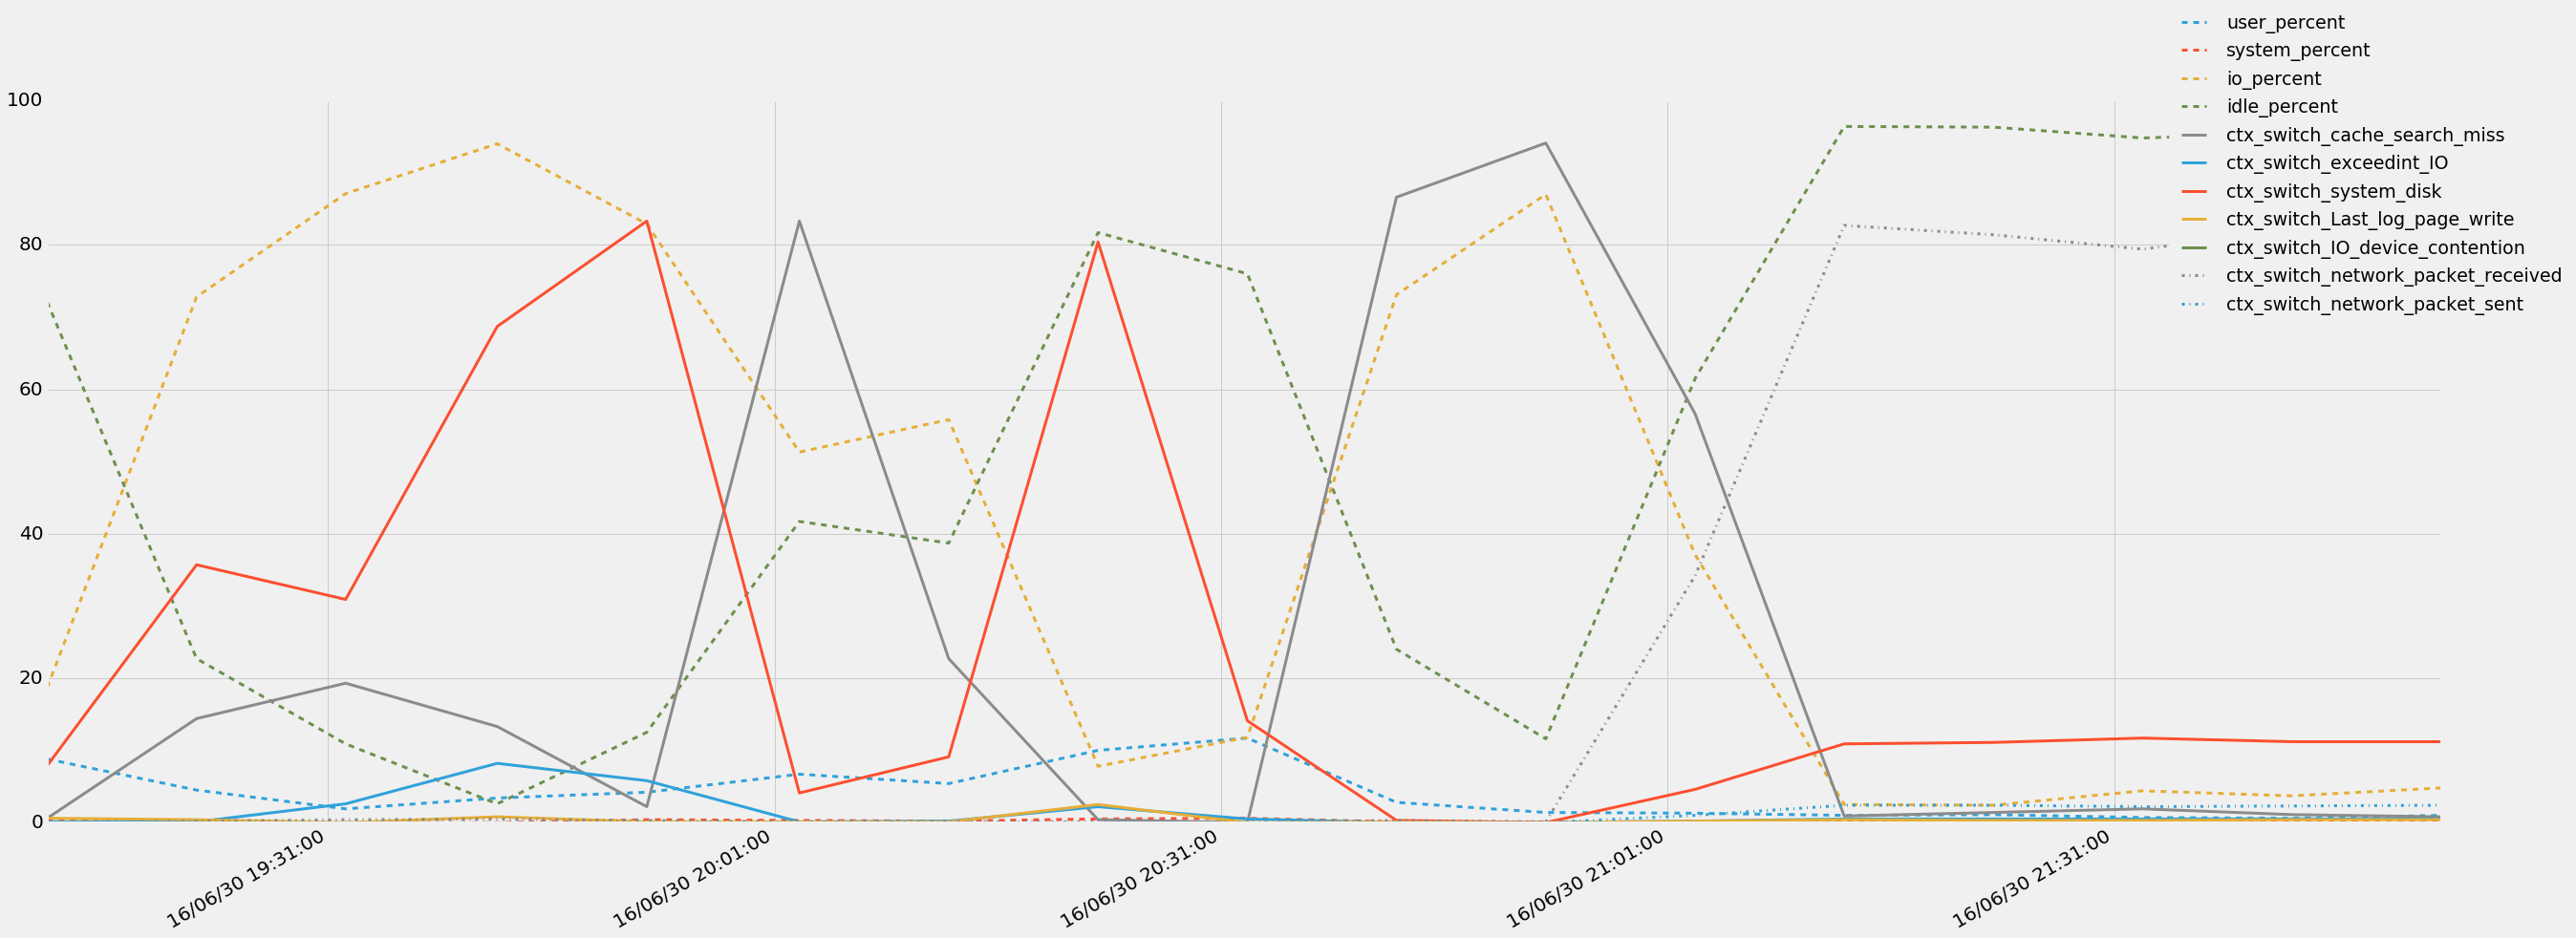

In [22]:
my_fig_size()
plt.figure()
my_x_axis(minorLocator)
plt.plot(x,new_data[["user_percent","system_percent","io_percent","idle_percent"]], "--")
plt.plot(x,new_data[["ctx_switch_cache_search_miss","ctx_switch_exceedint_IO","ctx_switch_system_disk","ctx_switch_Last_log_page_write","ctx_switch_IO_device_contention"]])
plt.plot(x,new_data[["ctx_switch_network_packet_received","ctx_switch_network_packet_sent"]], "-.")
plt.legend(new_data[["user_percent","system_percent","io_percent","idle_percent","ctx_switch_cache_search_miss","ctx_switch_exceedint_IO","ctx_switch_system_disk","ctx_switch_Last_log_page_write","ctx_switch_IO_device_contention","ctx_switch_network_packet_received","ctx_switch_network_packet_sent"]],bbox_to_anchor=(1, 1),loc=1,bbox_transform=plt.gcf().transFigure,fontsize=19)